In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 

%matplotlib inline

import os
print(os.listdir("../DSA project"))

['.ipynb_checkpoints', 'data.csv', 'DSA PROJECT.ipynb', 'EDA of DSA Project.ipynb', 'EDA-AirQualityPrediction.ipynb']


In [7]:
aqi = pd.read_csv('./data.csv', encoding = "ISO-8859-1", parse_dates=['date'], low_memory=False)
aqi.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


#### We can see that there are quite a number of NaNs in the dataset. To proceed with the EDA, we must handle these NaNs by either removing them or filling them. We will do both.

In [8]:
# checking the original dataset
print(aqi.isnull().sum())
print(aqi.shape)
aqi.info()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64
(435742, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   stn_code                     291665 non-null  object        
 1   sampling_date                435739 non-null  object        
 2   state                        435742 non-null  object        
 3   location                     43573

#### Since the geographical nomenclature has changed over time, we change it here as well to correspond to more accurate insights.

#### Currently, the type column has several names for the same type and therefore, it is better to clean it up and make it more uniform.

In [9]:
# Cleaning up the data
# Changing types to uniform format

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}
aqi.type = aqi.type.replace(types)
aqi.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,I,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,RRO,6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,I,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


#### This looks better with the empty columns dropped. We continue with cleaning the dataset

In [10]:
# defining columns of importance, which shall be used reguarly
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

#### Filling NaNs
Since our pollutants column contain a lot of NaNs, we must fill them to have consistent data. If we drop the rows containing NaNs, we will be left with nothing.
We have used the SimpleImputer from sklearn.imputer (v0.20.2) to fill the missing values in every column with the mean.

In [11]:
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
aqi[VALUE_COLS] = imputer.fit_transform(aqi[VALUE_COLS])

In [12]:
# checking to see if the dataset has any null values left over and the format
print(aqi.isnull().sum())
aqi.tail()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                                0
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27491
pm2_5                               0
date                                7
dtype: int64


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,143.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,46.000000,171.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaT
435740,NaN,NaN,Lakshadweep,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaT
435741,NaN,NaN,Tripura,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaT


#### Cleaned dataset
Our dataset is now clean with no null values as can be seen.

# Exploratory Data Analysis

In [13]:
# defining a function that plots SO2, NO2, RSPM and SPM yearly average levels for a given state
# since data is available monthly, it was resampled to a year and averaged to obtain yearly averages
# years for which no data was collected has not been imputed
def plot_for_state(state):
    fig, ax = plt.subplots(2,2, figsize=(20,12))
    fig.suptitle(state, size=20)
    state = aqi[aqi.state == state]
    state = state.reset_index().set_index('date')[VALUE_COLS].resample('Y').mean()
    state.so2.plot(legend=True, ax=ax[0][0], title="so2")
    ax[0][0].set_ylabel("so2 (µg/m3)")
    ax[0][0].set_xlabel("Year")
    
    state.no2.plot(legend=True, ax=ax[0][1], title="no2")
    ax[0][1].set_ylabel("no2 (µg/m3)")
    ax[0][1].set_xlabel("Year")
    
    state.rspm.plot(legend=True, ax=ax[1][0], title="rspm")
    ax[1][0].set_ylabel("RSPM (PM10 µg/m3)")
    ax[1][0].set_xlabel("Year")
    
    state.spm.plot(legend=True, ax=ax[1][1], title="spm")
    ax[1][1].set_ylabel("SPM (PM10 µg/m3)")
    ax[1][1].set_xlabel("Year")

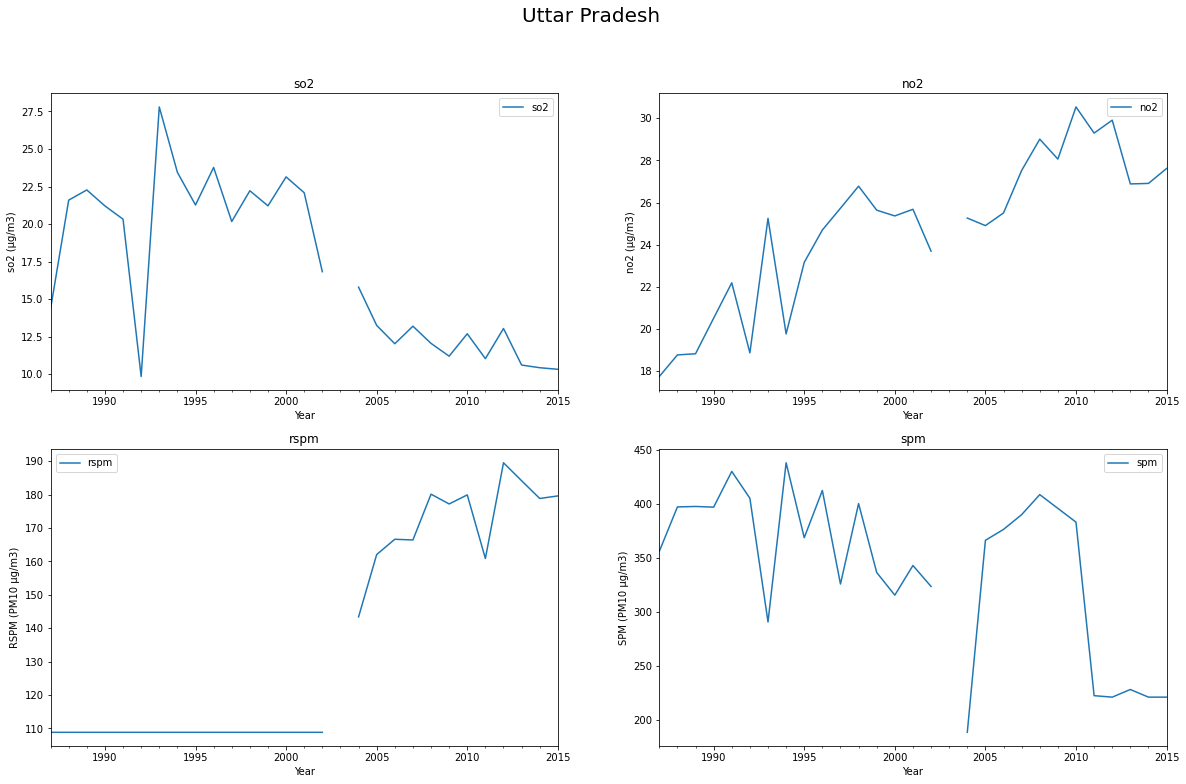

In [14]:
plot_for_state("Uttar Pradesh")

#### Plotting Uttar Pradesh, we see that SO2 levels have fallen in the state while NO2 levels have risen. Information about RSPM and SPM can't be concluded since a lot of data is missing.

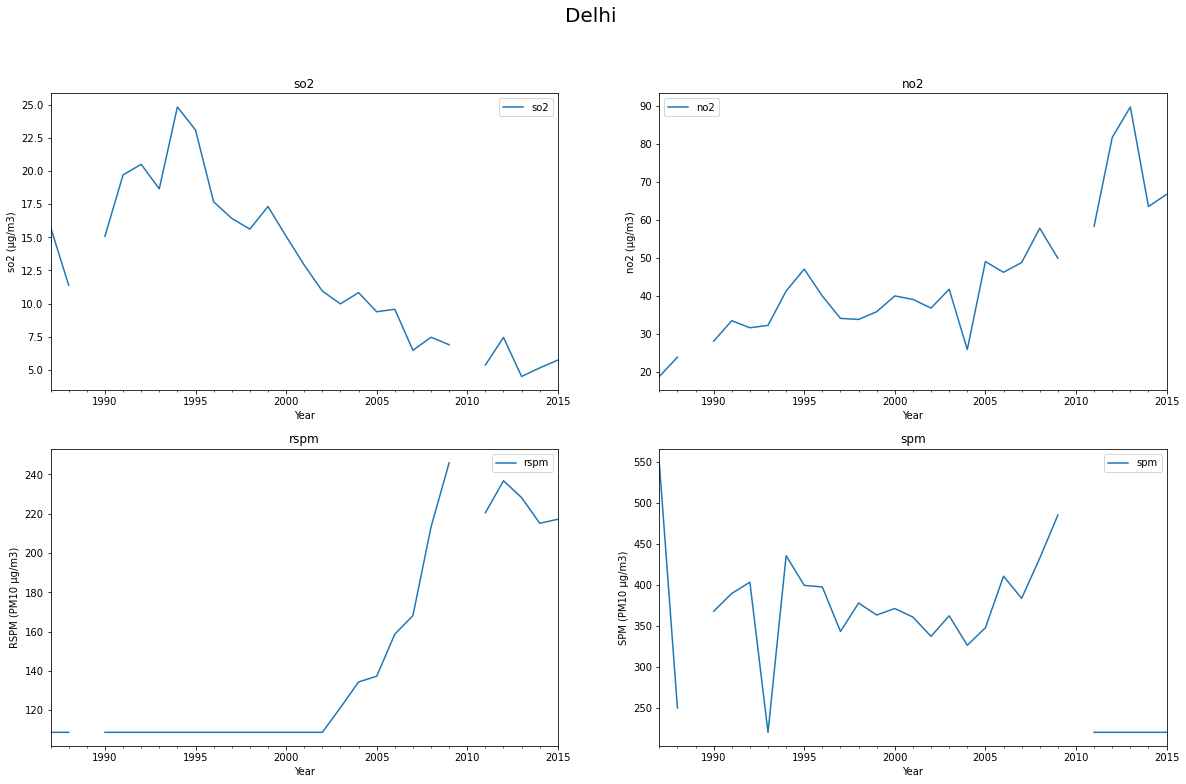

In [15]:
plot_for_state("Delhi")

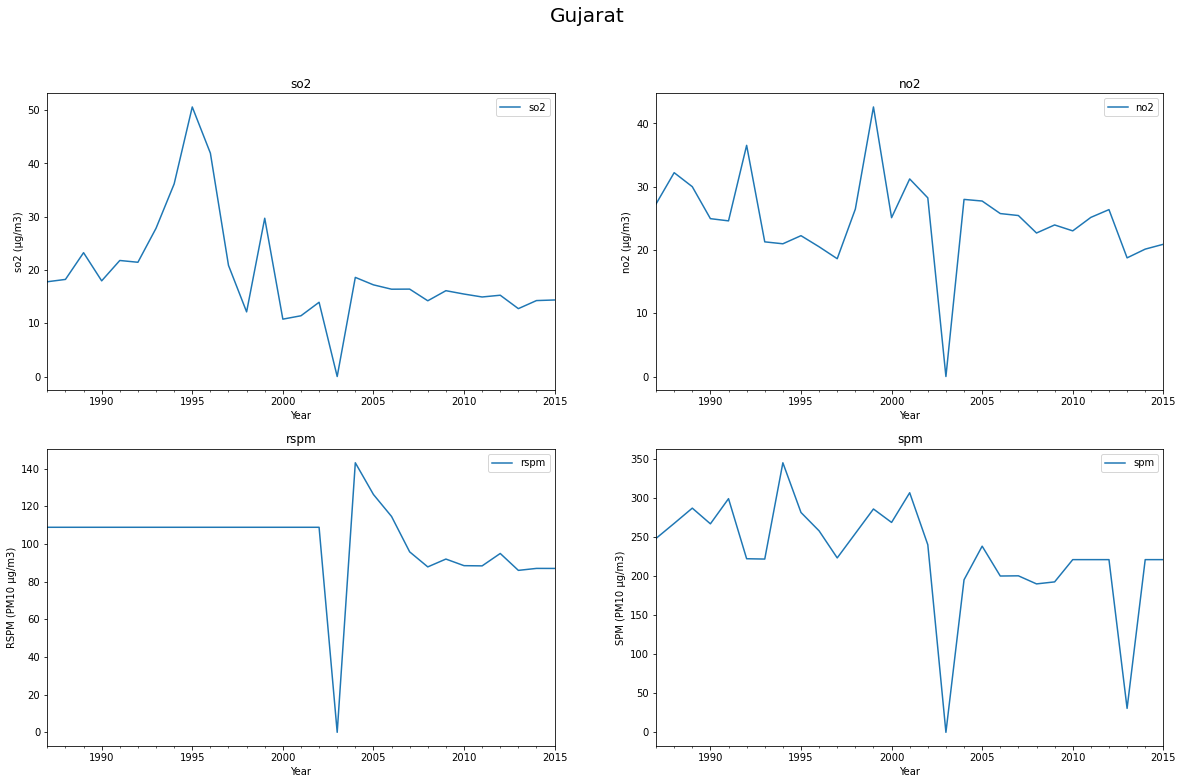

In [16]:
plot_for_state("Gujarat")

## Plotting highest and lowest ranking states

In [17]:
# defining a function to find and plot the top 10 and bottom 10 states for a given indicator (defaults to SO2)
def top_and_bottom_10_states(indicator="so2"):
    fig, ax = plt.subplots(2,1, figsize=(20, 12))
    
    ind = aqi[[indicator, 'state']].groupby('state', as_index=False).median().sort_values(by=indicator,ascending=False)
    top10 = sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0], color='r')
    top10.set_title("Top 10 states by {} (1991-2016)".format(indicator))
    top10.set_ylabel("so2 (µg/m3)")
    top10.set_xlabel("State")
    
    bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax[1], color='g')
    bottom10.set_title("Bottom 10 states by {} (1991-2016)".format(indicator))
    bottom10.set_ylabel("so2 (µg/m3)")
    bottom10.set_xlabel("State")

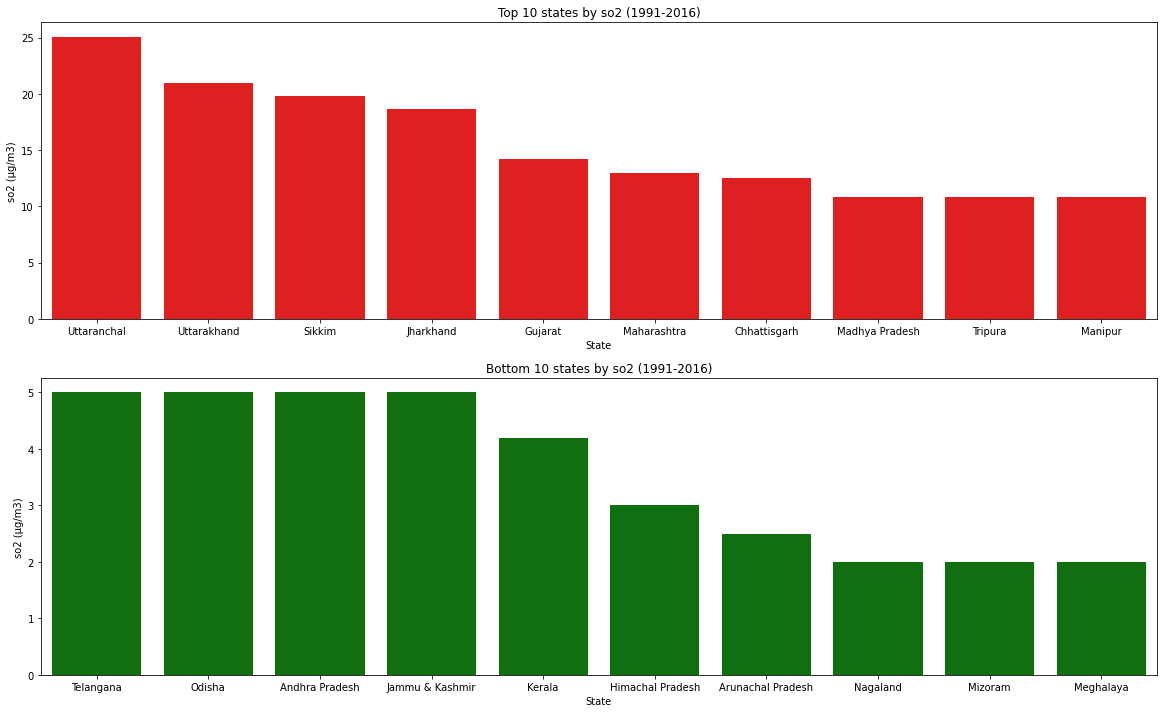

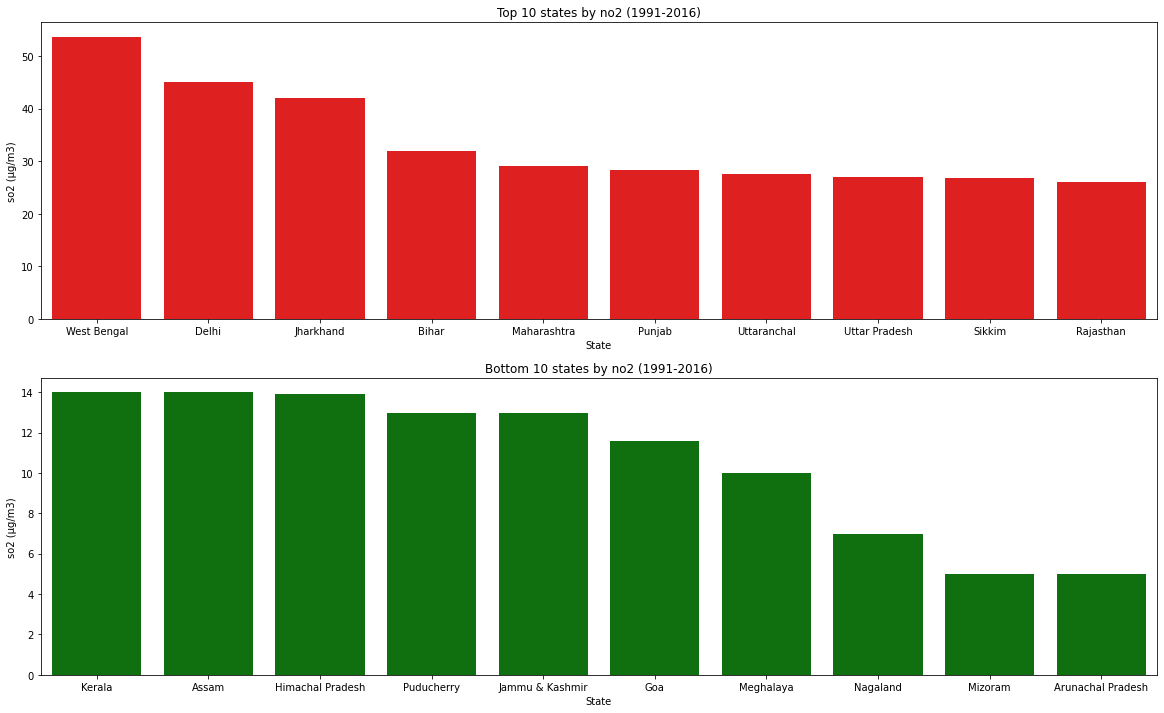

In [18]:
top_and_bottom_10_states("so2")
top_and_bottom_10_states("no2")

#### Plotting for SO2, we can see that the top state is Uttarakhand, while the bottom state is Meghalaya.

#### Plotting for NO2, we can see that the top state is West Bengal, while the bottom state is Mizoram.

## Plotting the highest ever recorded levels

In [19]:
# defining a function to find the highest ever recorded levels for a given indicator (defaults to SO2) by state
# sidenote: mostly outliers
def highest_levels_recorded(indicator="so2"):
    plt.figure(figsize=(20,10))
    ind = aqi[[indicator, 'location', 'state', 'date']].groupby('state', as_index=False).max()
    highest = sns.barplot(x='state', y=indicator, data=ind)
    highest.set_title("Highest ever {} levels recorded by state".format(indicator))
    plt.xticks(rotation=90)

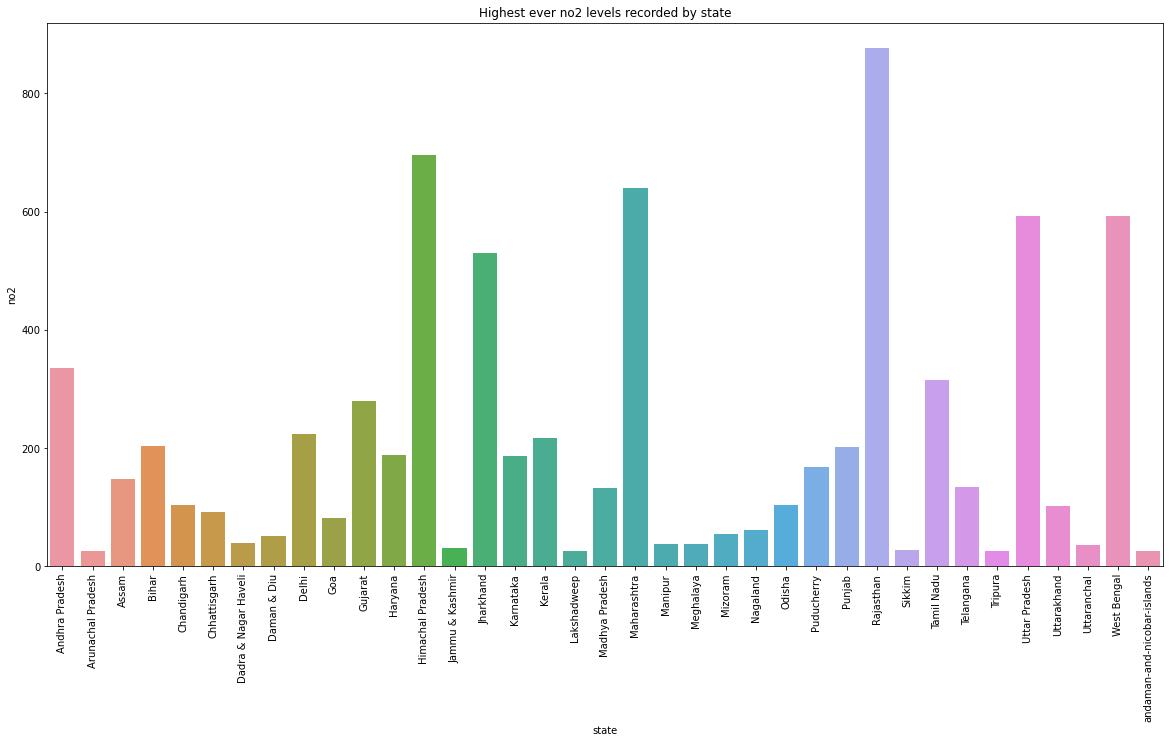

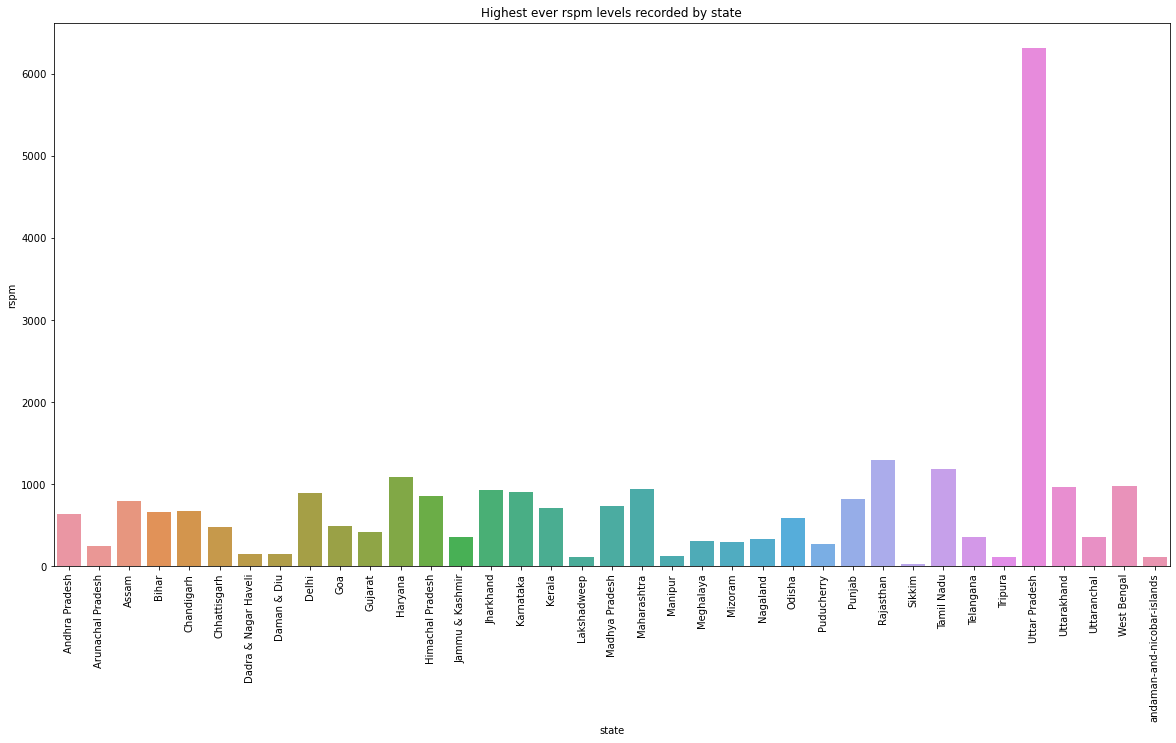

In [20]:
highest_levels_recorded("no2")
highest_levels_recorded("rspm")

#### Plotting for NO2, we can see that Rajasthan recorded the highest ever NO2 level. Plotting for RSPM, we can see that Uttar Pradesh recorded the highest ever RSPM level.

## Plotting yearly trends

In [21]:
# defining a function to plot the yearly trend values for a given indicator (defaults to SO2) and state (defaults to overall)
def yearly_trend(state="", indicator="so2", ):
    plt.figure(figsize=(20,12))
    aqi['year'] = aqi.date.dt.year
    if state == "":
        year_wise = aqi[[indicator, 'year', 'state']].groupby('year', as_index=False).median()
        trend = sns.pointplot(x='year', y=indicator, data=year_wise)
        trend.set_title('Yearly trend of {}'.format(indicator))
    else:
        year_wise = aqi[[indicator, 'year', 'state']].groupby(['state','year']).median().loc[state].reset_index()
        trend = sns.pointplot(x='year', y=indicator, data=year_wise)
        trend.set_title('Yearly trend of {} for {}'.format(indicator, state))

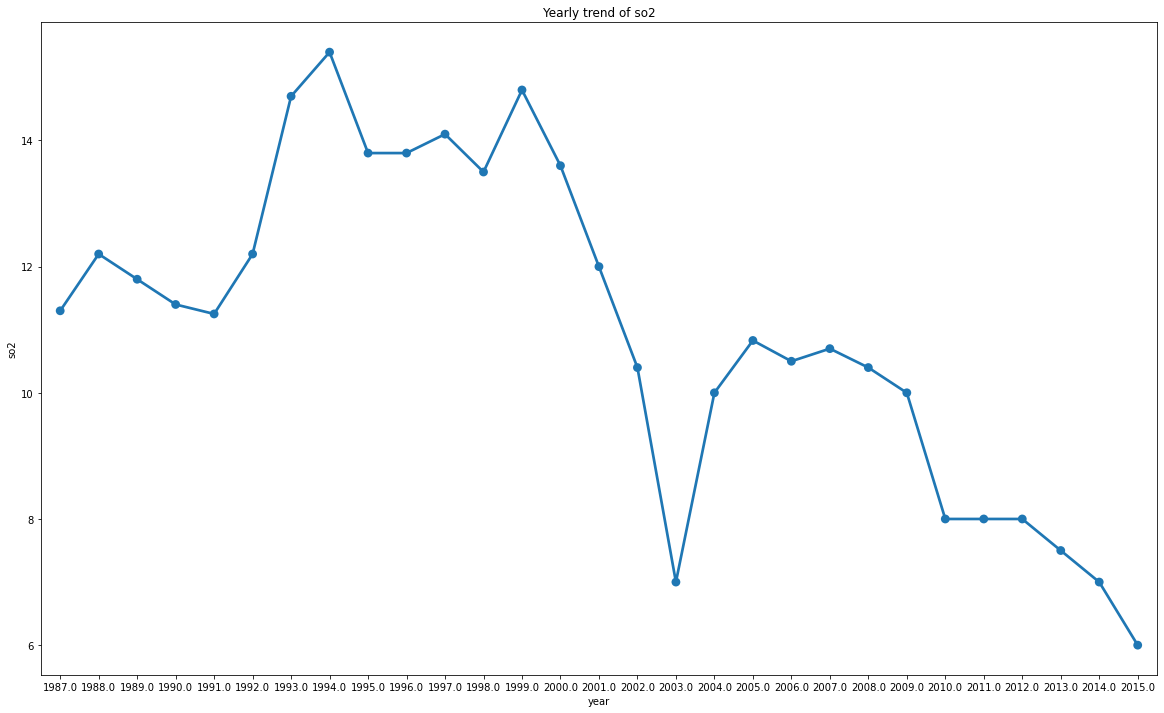

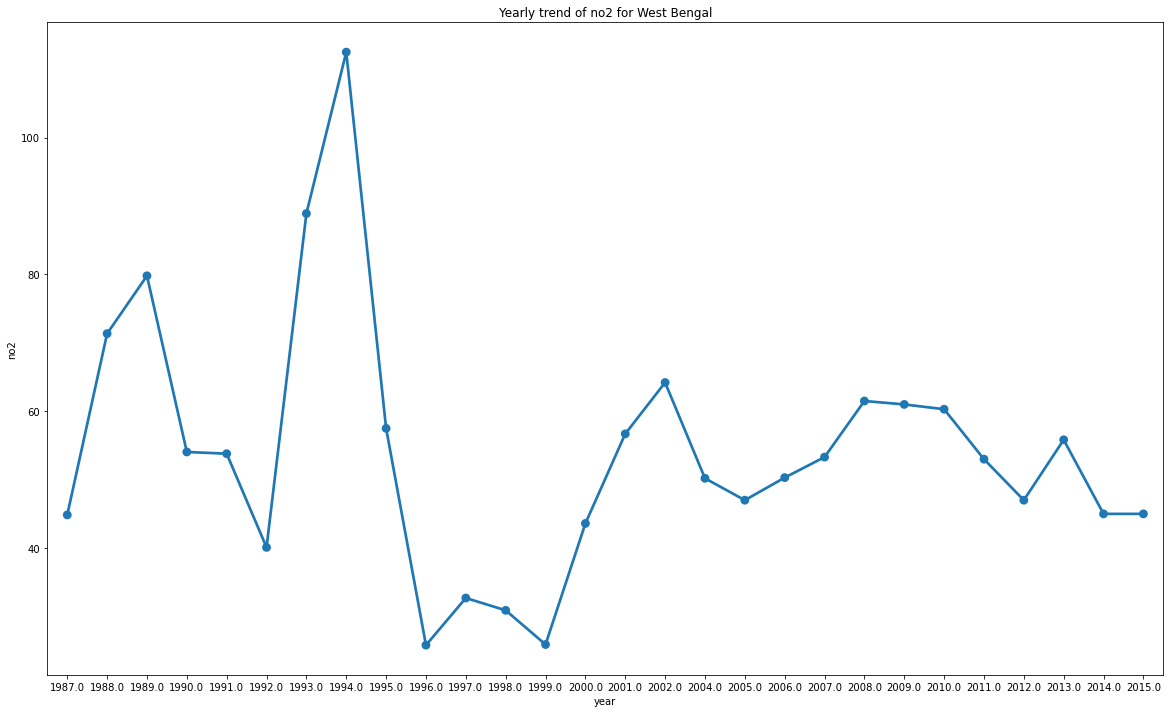

In [22]:
yearly_trend()
yearly_trend("West Bengal", "no2")

#### Plotting for SO2, we can see the yearly trend for sulphur dioxide levels in the country. Plotting for NO2 in West Bengal, we can see the yearly trend.

## Plotting a heatmap for a particular indicator

In [23]:
# defining a function to plot a heatmap for yearly median average for a given indicator (defaults to SO2)
def indicator_by_state_and_year(indicator="so2"):
    plt.figure(figsize=(20, 20))
    hmap = sns.heatmap(
        data=aqi.pivot_table(values=indicator, index='state', columns='year', aggfunc='median', margins=True),
               annot=True, linewidths=.5, cbar=True, square=True, cmap='inferno', cbar_kws={'label': "Annual Average"})
    
    hmap.set_title("{} by state and year".format(indicator))

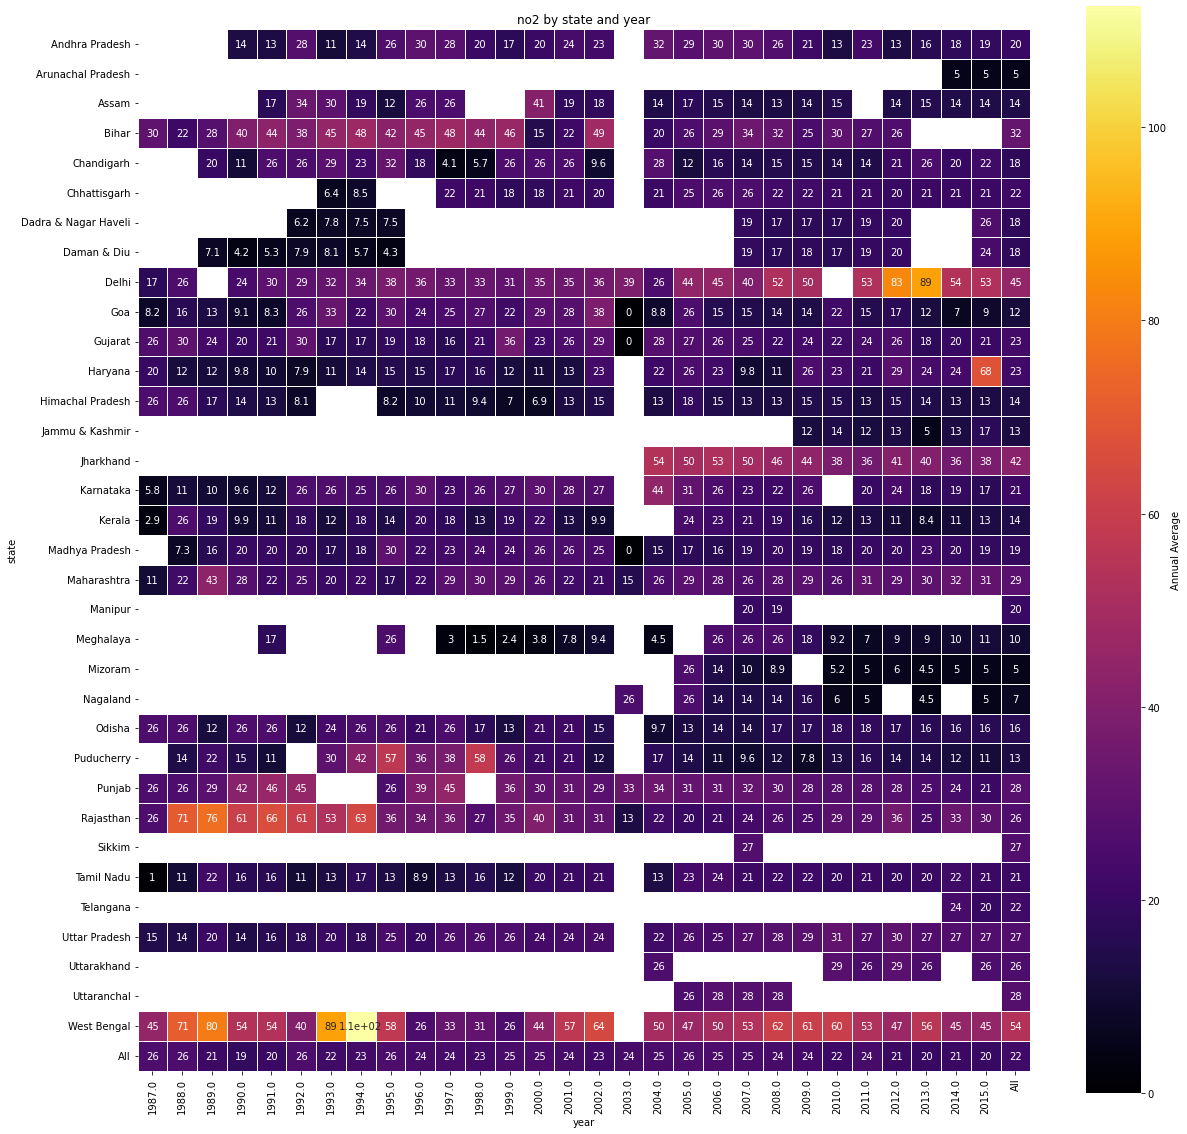

In [24]:
indicator_by_state_and_year('no2')

## Plotting the relationship between two indicators

In [25]:
# defining a function to plot the relationship between two indicators on yearly averages.
def relation(ind1="so2", ind2="no2"):
    relation = sns.jointplot(x=ind1, y=ind2, data=aqi.set_index('date').resample('Y').mean(), kind='reg')

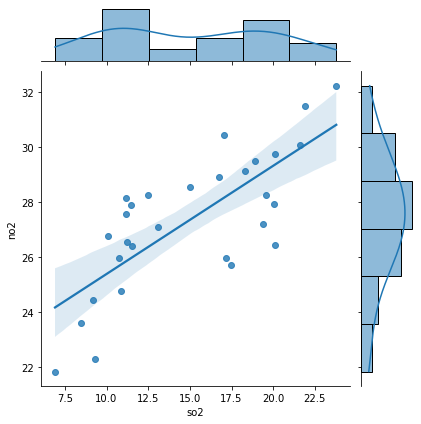

In [26]:
relation()

#### Plotting for SO2 and NO2, we see a fairly positively sloped line indicating that the two pollutants move simultaneously.

## Plotting pollutant average by type

In [29]:
# defining a function to plot pollutant averages by type for a given indicator
def type_avg(indicator=""):
    type_avg = aqi[VALUE_COLS + ['type', 'date']].groupby("type").mean()
    if indicator != "":
        t = type_avg[indicator].plot(kind='bar')
        plt.xticks(rotation = 0)
        plt.title("Pollutant average by type for {}".format(indicator))
    else:
        t = type_avg.plot(kind='bar')
        plt.xticks(rotation = 0)
        plt.title("Pollutant average by type")

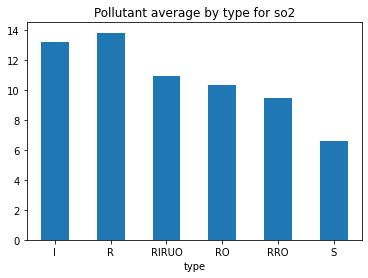

In [30]:
type_avg('so2')

#### Plotting for SO2, we can see that the Residential areas generate most SO2, follwed closely by industrial areas.

## Plotting pollutant averages by locations/state

In [31]:
# defining a function to plot pollutant averages for a given indicator (defaults to SO2) by locations in a given state
def location_avgs(state, indicator="so2"):
    locs = aqi[VALUE_COLS + ['state', 'location', 'date']].groupby(['state', 'location']).mean()
    state_avgs = locs.loc[state].reset_index()
    sns.barplot(x='location', y=indicator, data=state_avgs)
    plt.title("Location-wise average for {} in {}".format(indicator, state))
    plt.xticks(rotation = 90)

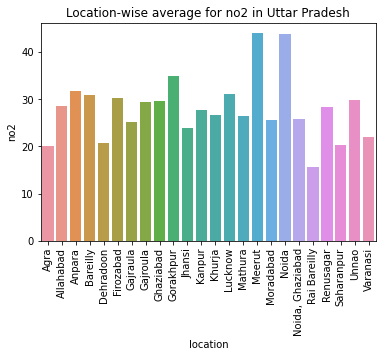

In [32]:
location_avgs("Uttar Pradesh", "no2")

#### Plottting for NO2 and Uttar Pradesh, we can see that Meerut and Noida emitted the most NO2 on average.